<a href="https://colab.research.google.com/github/gvictor00/alura/blob/main/Machine_Learning_Introdu%C3%A7%C3%A3o_a_algoritmos_n%C3%A3o_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

uri = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()


,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Coleta, a partir da tabela, os generos dos filmes, separados em colunas.

In [2]:
generos = filmes.generos.str.get_dummies()

In [3]:
dados_filmes = pd.concat([filmes, generos], axis=1)
dados_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

Apesar do curso indicar que é uma boa prática reescalar os dados, a informação não é verdadeira. O **StandardScaler** é uma boa ferramenta quando as *features* apresentam unidades diferentes como, por exemplo, o tempo e a velocidade. O primeiro é medido em minutos e o segundo é medido em km/h. A utilização do StandardScaler é considerada uma boa prática, principalmente para ao empregar algoritmos sensíveis às variações de escala das *features*, como o K-MEANS, PCA, SVM e outros... 

Por fim, somente com as informações presentes no *dataset*, até esse ponto, **não é possível** determinar qual é a caracaterística predominante no filme.

Como os dados são binários **o k-means deve até ser evitado**, para esse caso a distancia Euclidiana não trás um significado real, visto que o espaço dimensional dos dados passa a ser discreto e sem uma origem natural. Para esse problema você poderia transformar os gêneros em dados categóricos e aplicar variações do k-means conhecida como k-modes, introduzidas no [paper](https://arxiv.org/ftp/cs/papers/0603/0603120.pdf) de Zhexue Huang.

Seguindo o curso...

In [5]:
from sklearn.cluster import KMeans

In [6]:
num_clusters = 3
modelo = KMeans(n_clusters=num_clusters)

In [7]:
modelo.fit(generos_escalados)
#print('Grupos {}'.format(modelo.labels_))
print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


In [8]:
print(modelo.cluster_centers_)

[[-0.05917995  0.74200625  0.18093754 -0.23305195 -0.26755066 -0.55783537
   0.54544239 -0.21572942 -0.14904186  0.01512071  0.20422298  0.44675674
   0.16385086 -0.18038424  0.4645948  -0.33795695  0.48941318  1.19515162
  -0.13422983 -0.04759083]
 [ 0.03609869 -0.32991683 -0.22162736 -0.25254459 -0.27045122  0.21664443
  -0.19655392  0.12948138  0.16094866 -0.14431473 -0.07735913 -0.1591803
  -0.11269706  0.02138375 -0.18958022  0.19632402 -0.24103297 -0.46578589
   0.0874681   0.0347226 ]
 [-0.05917995 -0.03539512  0.88588694  2.26782981  2.48012455  0.22546818
  -0.31725926 -0.20236248 -0.59279773  0.87107661 -0.09492563 -0.27133656
   0.24464285  0.38129658 -0.12982352 -0.27571356  0.12508482 -0.47273759
  -0.16965093 -0.08366277]]


In [9]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.742006,0.180938,-0.233052,-0.267551,-0.557835,0.545442,-0.215729,-0.149042,0.015121,0.204223,0.446757,0.163851,-0.180384,0.464595,-0.337957,0.489413,1.195152,-0.134230,-0.047591
1,0.036099,-0.329917,-0.221627,-0.252545,-0.270451,0.216644,-0.196554,0.129481,0.160949,-0.144315,-0.077359,-0.159180,-0.112697,0.021384,-0.189580,0.196324,-0.241033,-0.465786,0.087468,0.034723
2,-0.059180,-0.035395,0.885887,2.267830,2.480125,0.225468,-0.317259,-0.202362,-0.592798,0.871077,-0.094926,-0.271337,0.244643,0.381297,-0.129824,-0.275714,0.125085,-0.472738,-0.169651,-0.083663


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9218cfc160>,
      dtype=object)

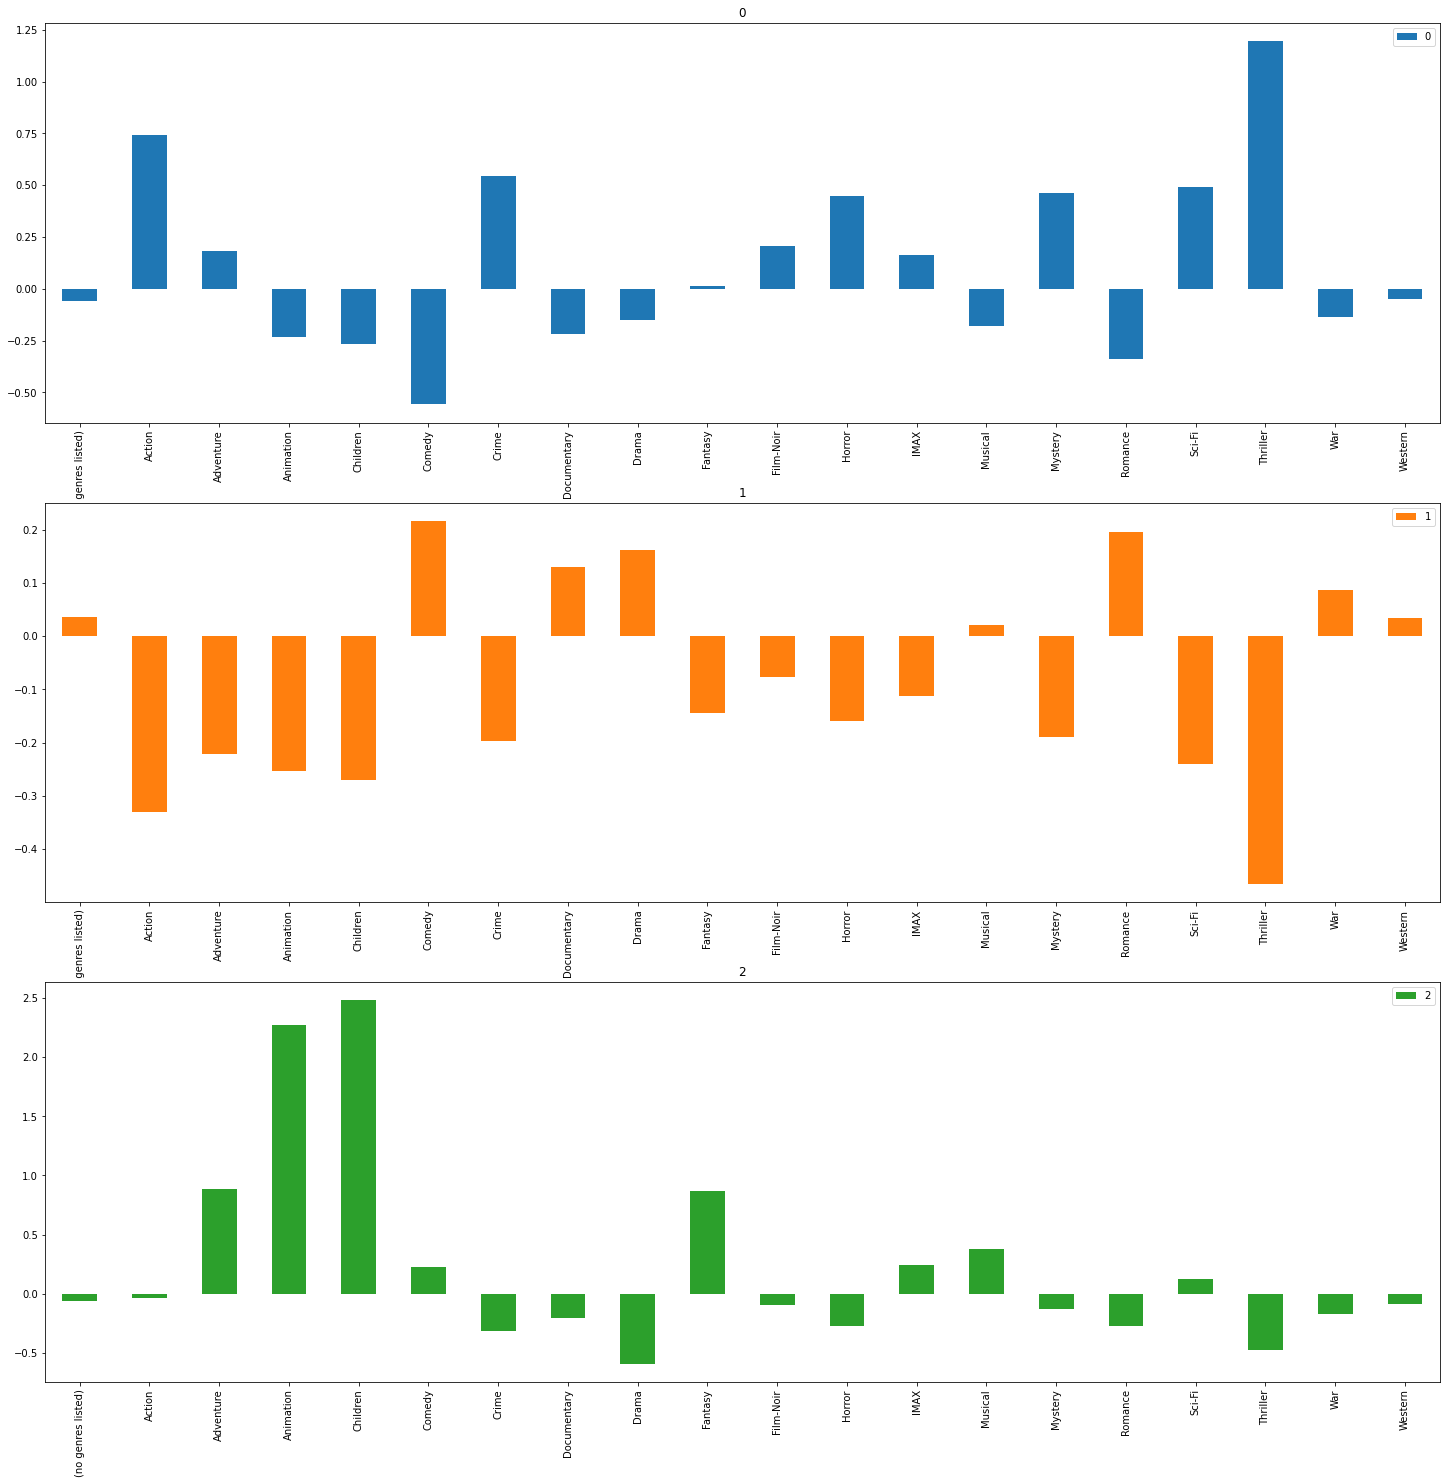

In [10]:
grupos.transpose().plot.bar(subplots=True,
                figsize=(25,25), 
                sharex=False)

In [11]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8428,111384,Blue Ruin (2013),Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6443,51927,Dead Silence (2007),Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
180,212,Bushwhacked (1995),Adventure|Comedy|Crime|Mystery,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7354,78469,"A-Team, The (2010)",Action|Comedy|Thriller,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6074,41527,Paradise Now (2005),Crime|Drama|Thriller|War,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0
8859,133377,Infini (2015),Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
9215,151777,The Finest Hours (2016),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4209,6095,Dragon Lord (a.k.a. Dragon Strike) (Long Xiao ...,Action,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2498,3334,Key Largo (1948),Crime|Drama|Film-Noir|Thriller,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4540,6734,Memoirs of an Invisible Man (1992),Comedy|Romance|Sci-Fi|Thriller,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0


Visualizando os centróides

In [12]:
from sklearn.datasets import make_blobs

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


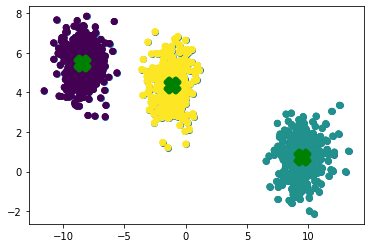

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)

modelo1 = KMeans(n_clusters=num_clusters)
grupos = modelo1.fit_predict(dados)

plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

centroides = modelo1.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')

plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

De volta às aulas. Vamos utilizar o TSNE, que é um algoritmo de redução dos dados. É possível reduzir o número de dimensões, com o custo de perder parte dos dados. 

Sairemos das 20 dimensões (número de tipos de filmes) para duas dimensões.

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

visualizacao

array([[-16.082573 ,  64.1445   ],
       [-11.901119 ,  52.762646 ],
       [ -3.2353191, -33.146156 ],
       ...,
       [  5.7482634,  31.393192 ],
       [-21.137215 ,   9.799661 ],
       [  2.2656727,  -5.5861564]], dtype=float32)

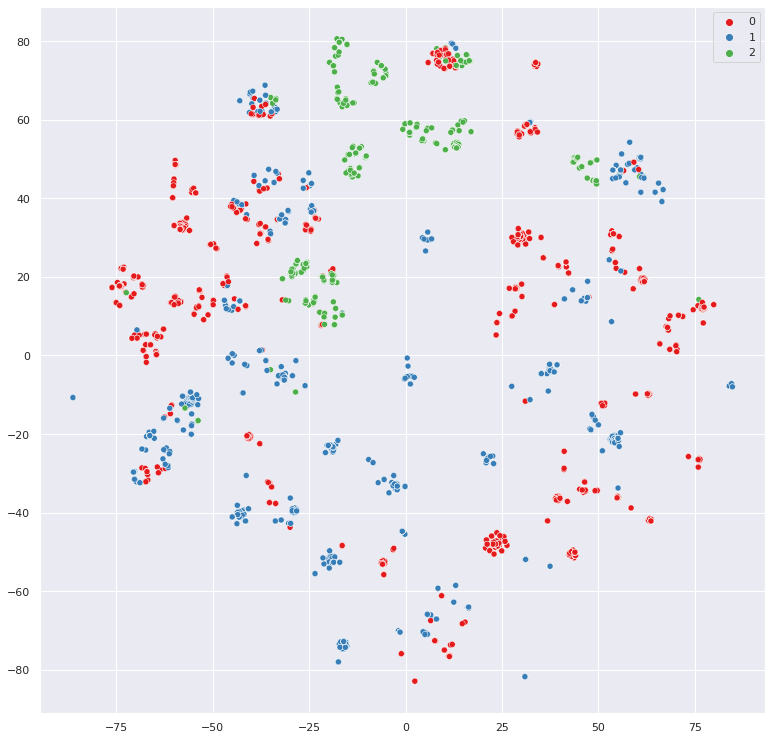

In [16]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

04. Escolhendo o número de grupos. E se direcionarmos para 20 grupos?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92357bc860>,
      dtype=object)

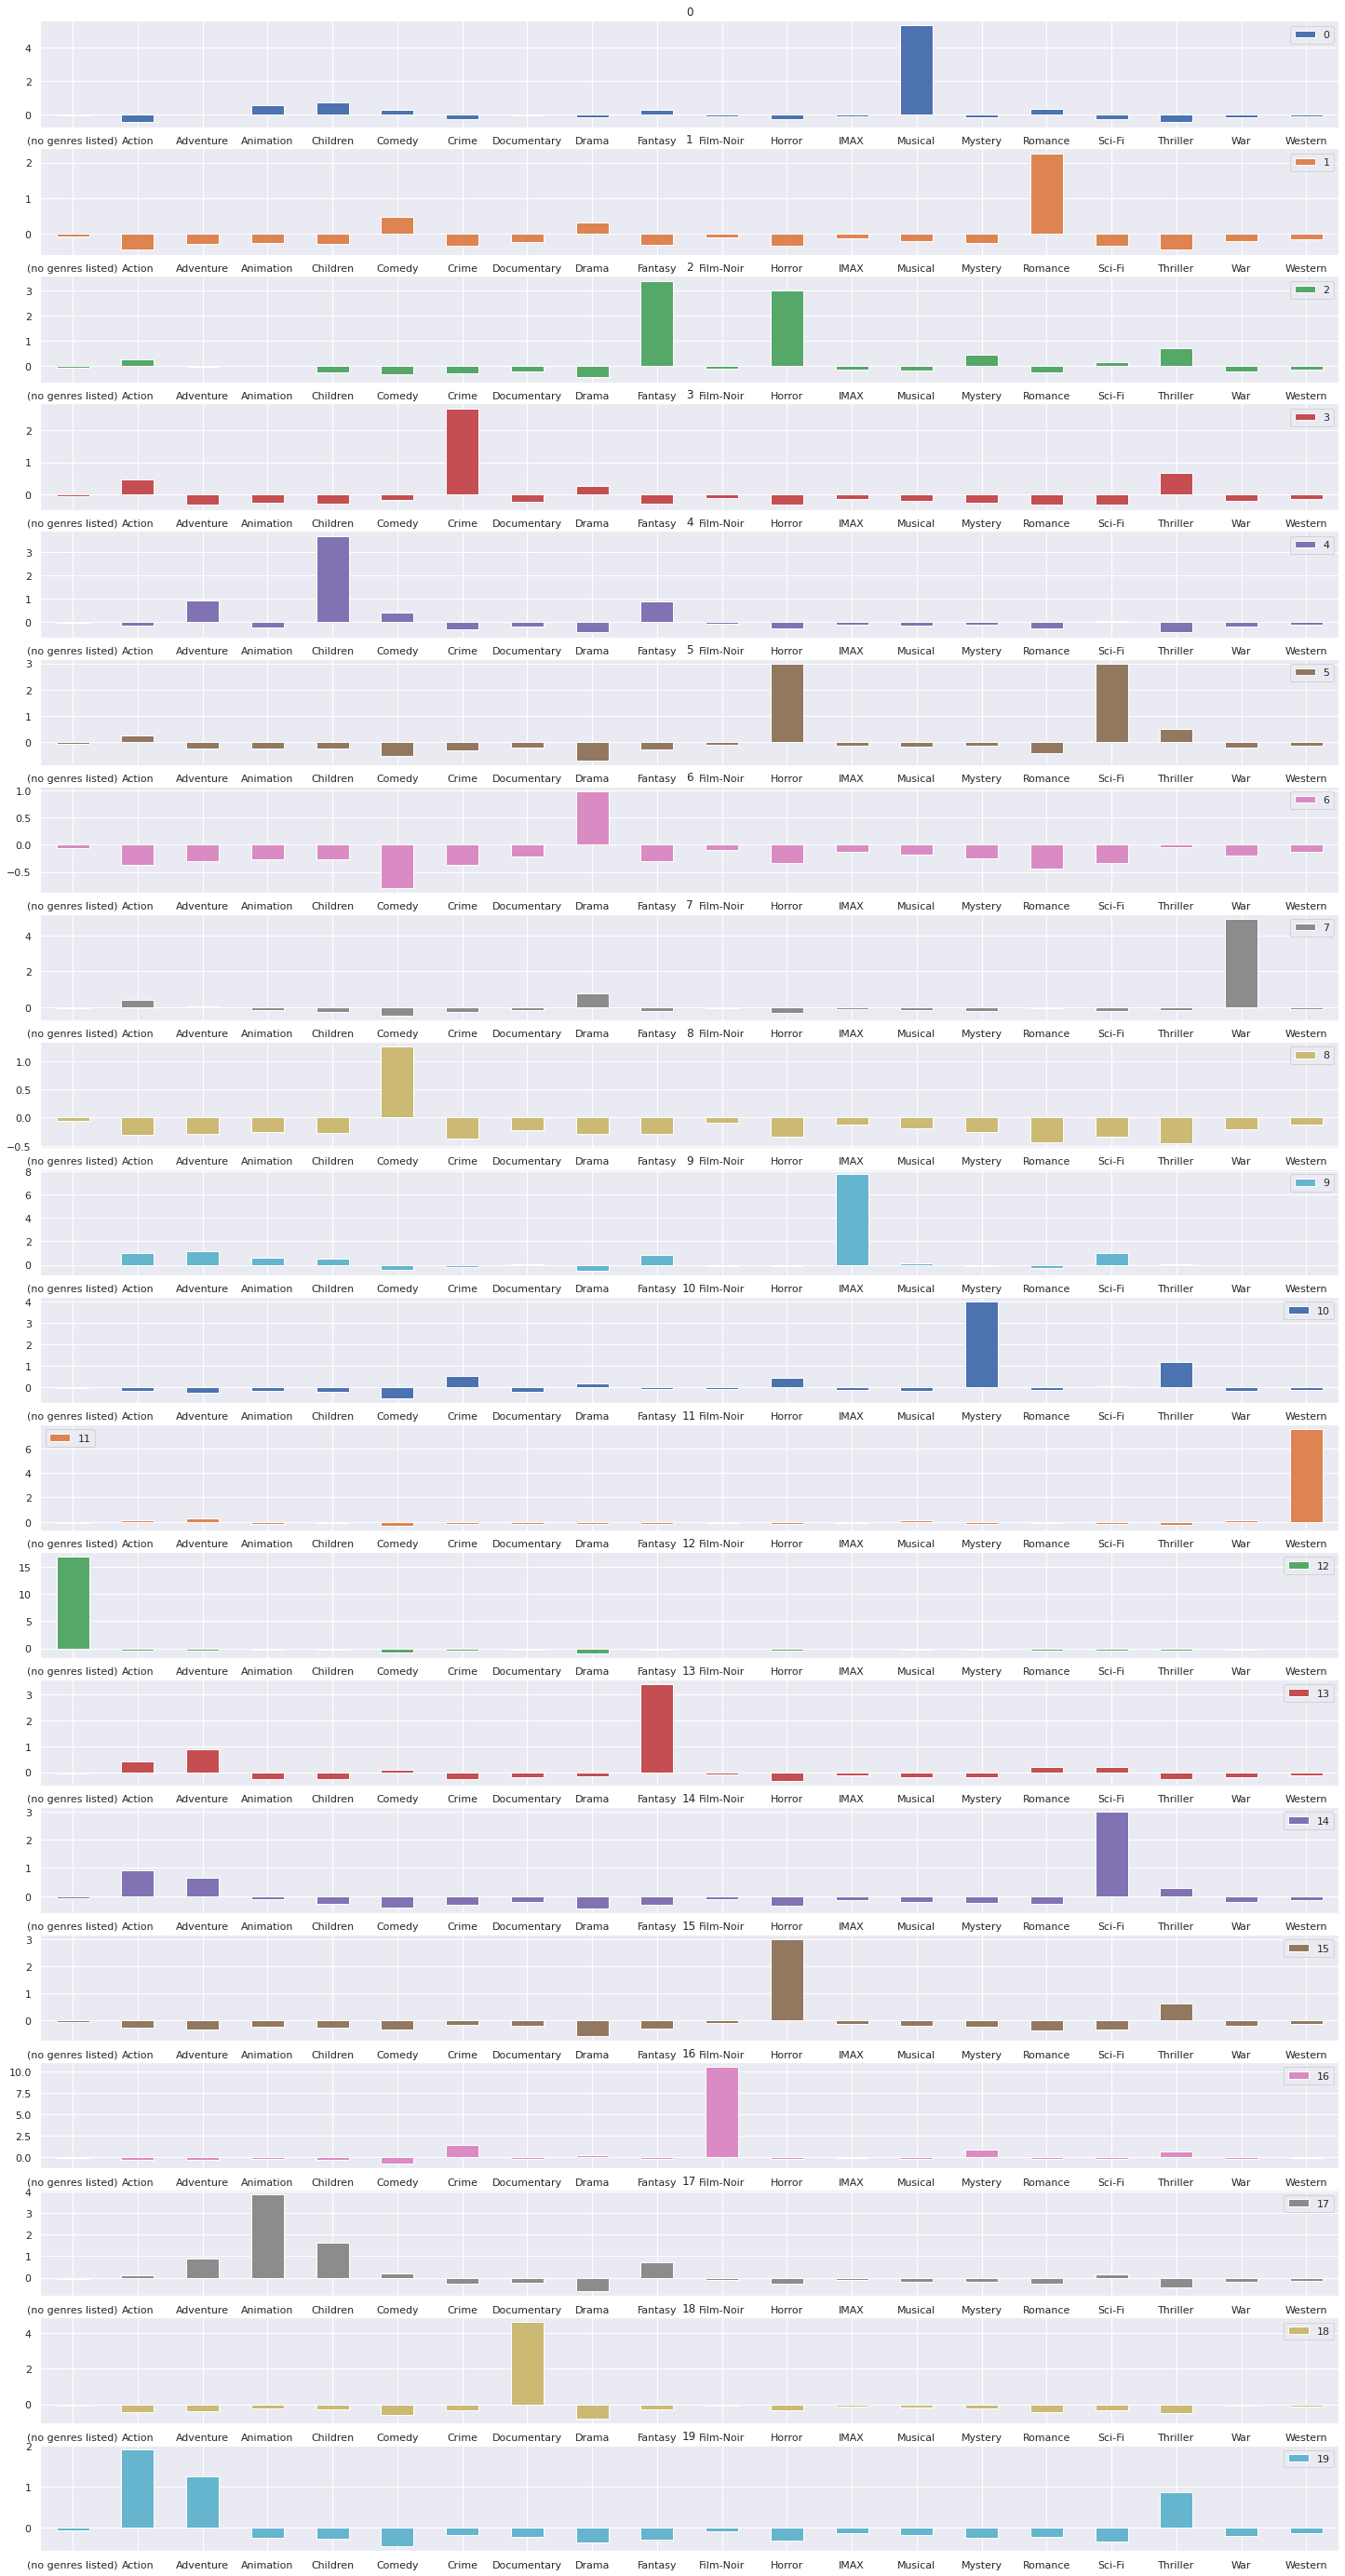

In [17]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                figsize=(25,50), 
                sharex=False,
                rot=0)

In [18]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7913,95207,Abraham Lincoln: Vampire Hunter (2012),Action|Fantasy|Horror|Thriller,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2326,3081,Sleepy Hollow (1999),Fantasy|Horror|Mystery|Romance,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
5537,26606,"Chinese Ghost Story, A (Sinnui yauwan) (1987)",Action|Fantasy|Horror|Romance,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
5392,8985,Blade: Trinity (2004),Action|Fantasy|Horror|Thriller,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
519,606,Candyman: Farewell to the Flesh (1995),Fantasy|Horror,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
8914,135534,Krampus (2015),Comedy|Fantasy|Horror,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
6397,50796,Blood and Chocolate (2007),Drama|Fantasy|Horror|Romance,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0
1994,2654,"Wolf Man, The (1941)",Drama|Fantasy|Horror,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
5551,26693,It (1990),Drama|Fantasy|Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
9309,159403,Neo Tokyo (1987),Adventure|Animation|Fantasy|Horror|Sci-Fi,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [19]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [20]:
kmeans(20,generos_escalados)

[20, 54550.531785042054]

In [21]:
kmeans(3, generos_escalados)

[3, 166613.6807883647]

In [22]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1,41)]
resultado

[[1, 194840.0],
 [2, 179909.54996425138],
 [3, 166558.3387388303],
 [4, 156766.66104662596],
 [5, 146106.4890814797],
 [6, 138436.90103078095],
 [7, 128233.95475105844],
 [8, 119045.48935159594],
 [9, 109568.31467075093],
 [10, 101992.71887895402],
 [11, 94410.74905660228],
 [12, 85897.72909593135],
 [13, 79846.64072533975],
 [14, 74445.01370677513],
 [15, 67203.68561022036],
 [16, 67502.86659203995],
 [17, 60274.41974743687],
 [18, 58759.13080902782],
 [19, 57070.19704737907],
 [20, 54561.78742082649],
 [21, 53860.95615773757],
 [22, 52412.48144163396],
 [23, 50374.87456715387],
 [24, 49205.949761649106],
 [25, 48266.78703706935],
 [26, 46881.70576204741],
 [27, 45586.340328035134],
 [28, 44333.25953456614],
 [29, 44234.351696736856],
 [30, 42833.01393620648],
 [31, 42454.82809218761],
 [32, 40304.286481058574],
 [33, 40323.66577064307],
 [34, 39019.19616244395],
 [35, 38186.06633098479],
 [36, 38363.429624840006],
 [37, 37005.89321031718],
 [38, 36653.86408885829],
 [39, 36256.289525

In [23]:
resultado = pd.DataFrame(resultado,
              columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179909.549964
2,3,166558.338739
3,4,156766.661047
4,5,146106.489081
5,6,138436.901031
6,7,128233.954751
7,8,119045.489352
8,9,109568.314671
9,10,101992.718879


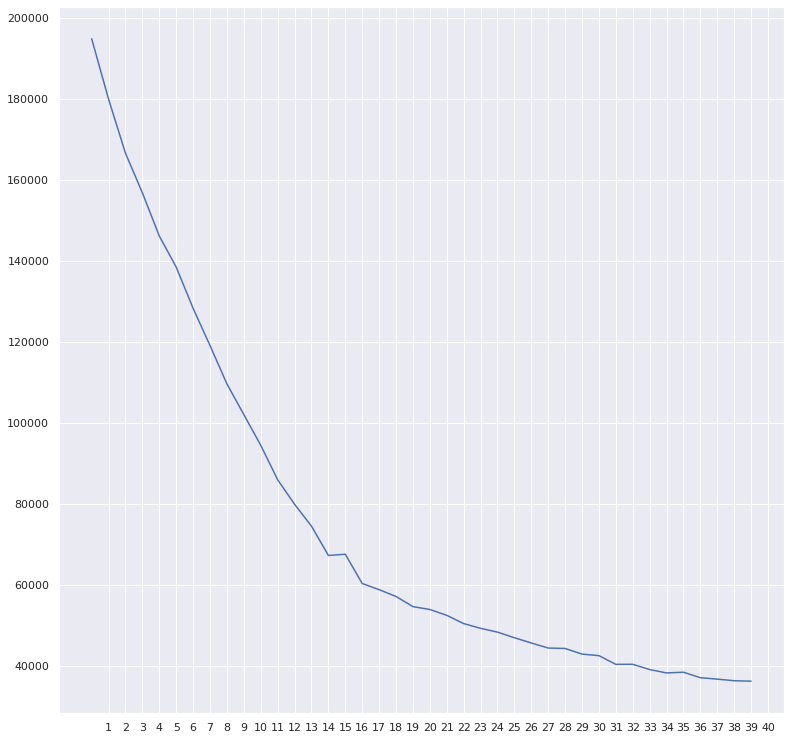

In [24]:
resultado.inertia.plot(xticks=resultado.grupos)

Na etapa anterior, após plotar o gráfico da relação de erro com o número de centróides, foi possível perceber, através da aplicação do *Elbow Method* (método do cotovelo) que um candidato a número ideal de centróides é o 17. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9214495780>,
      dtype=object)

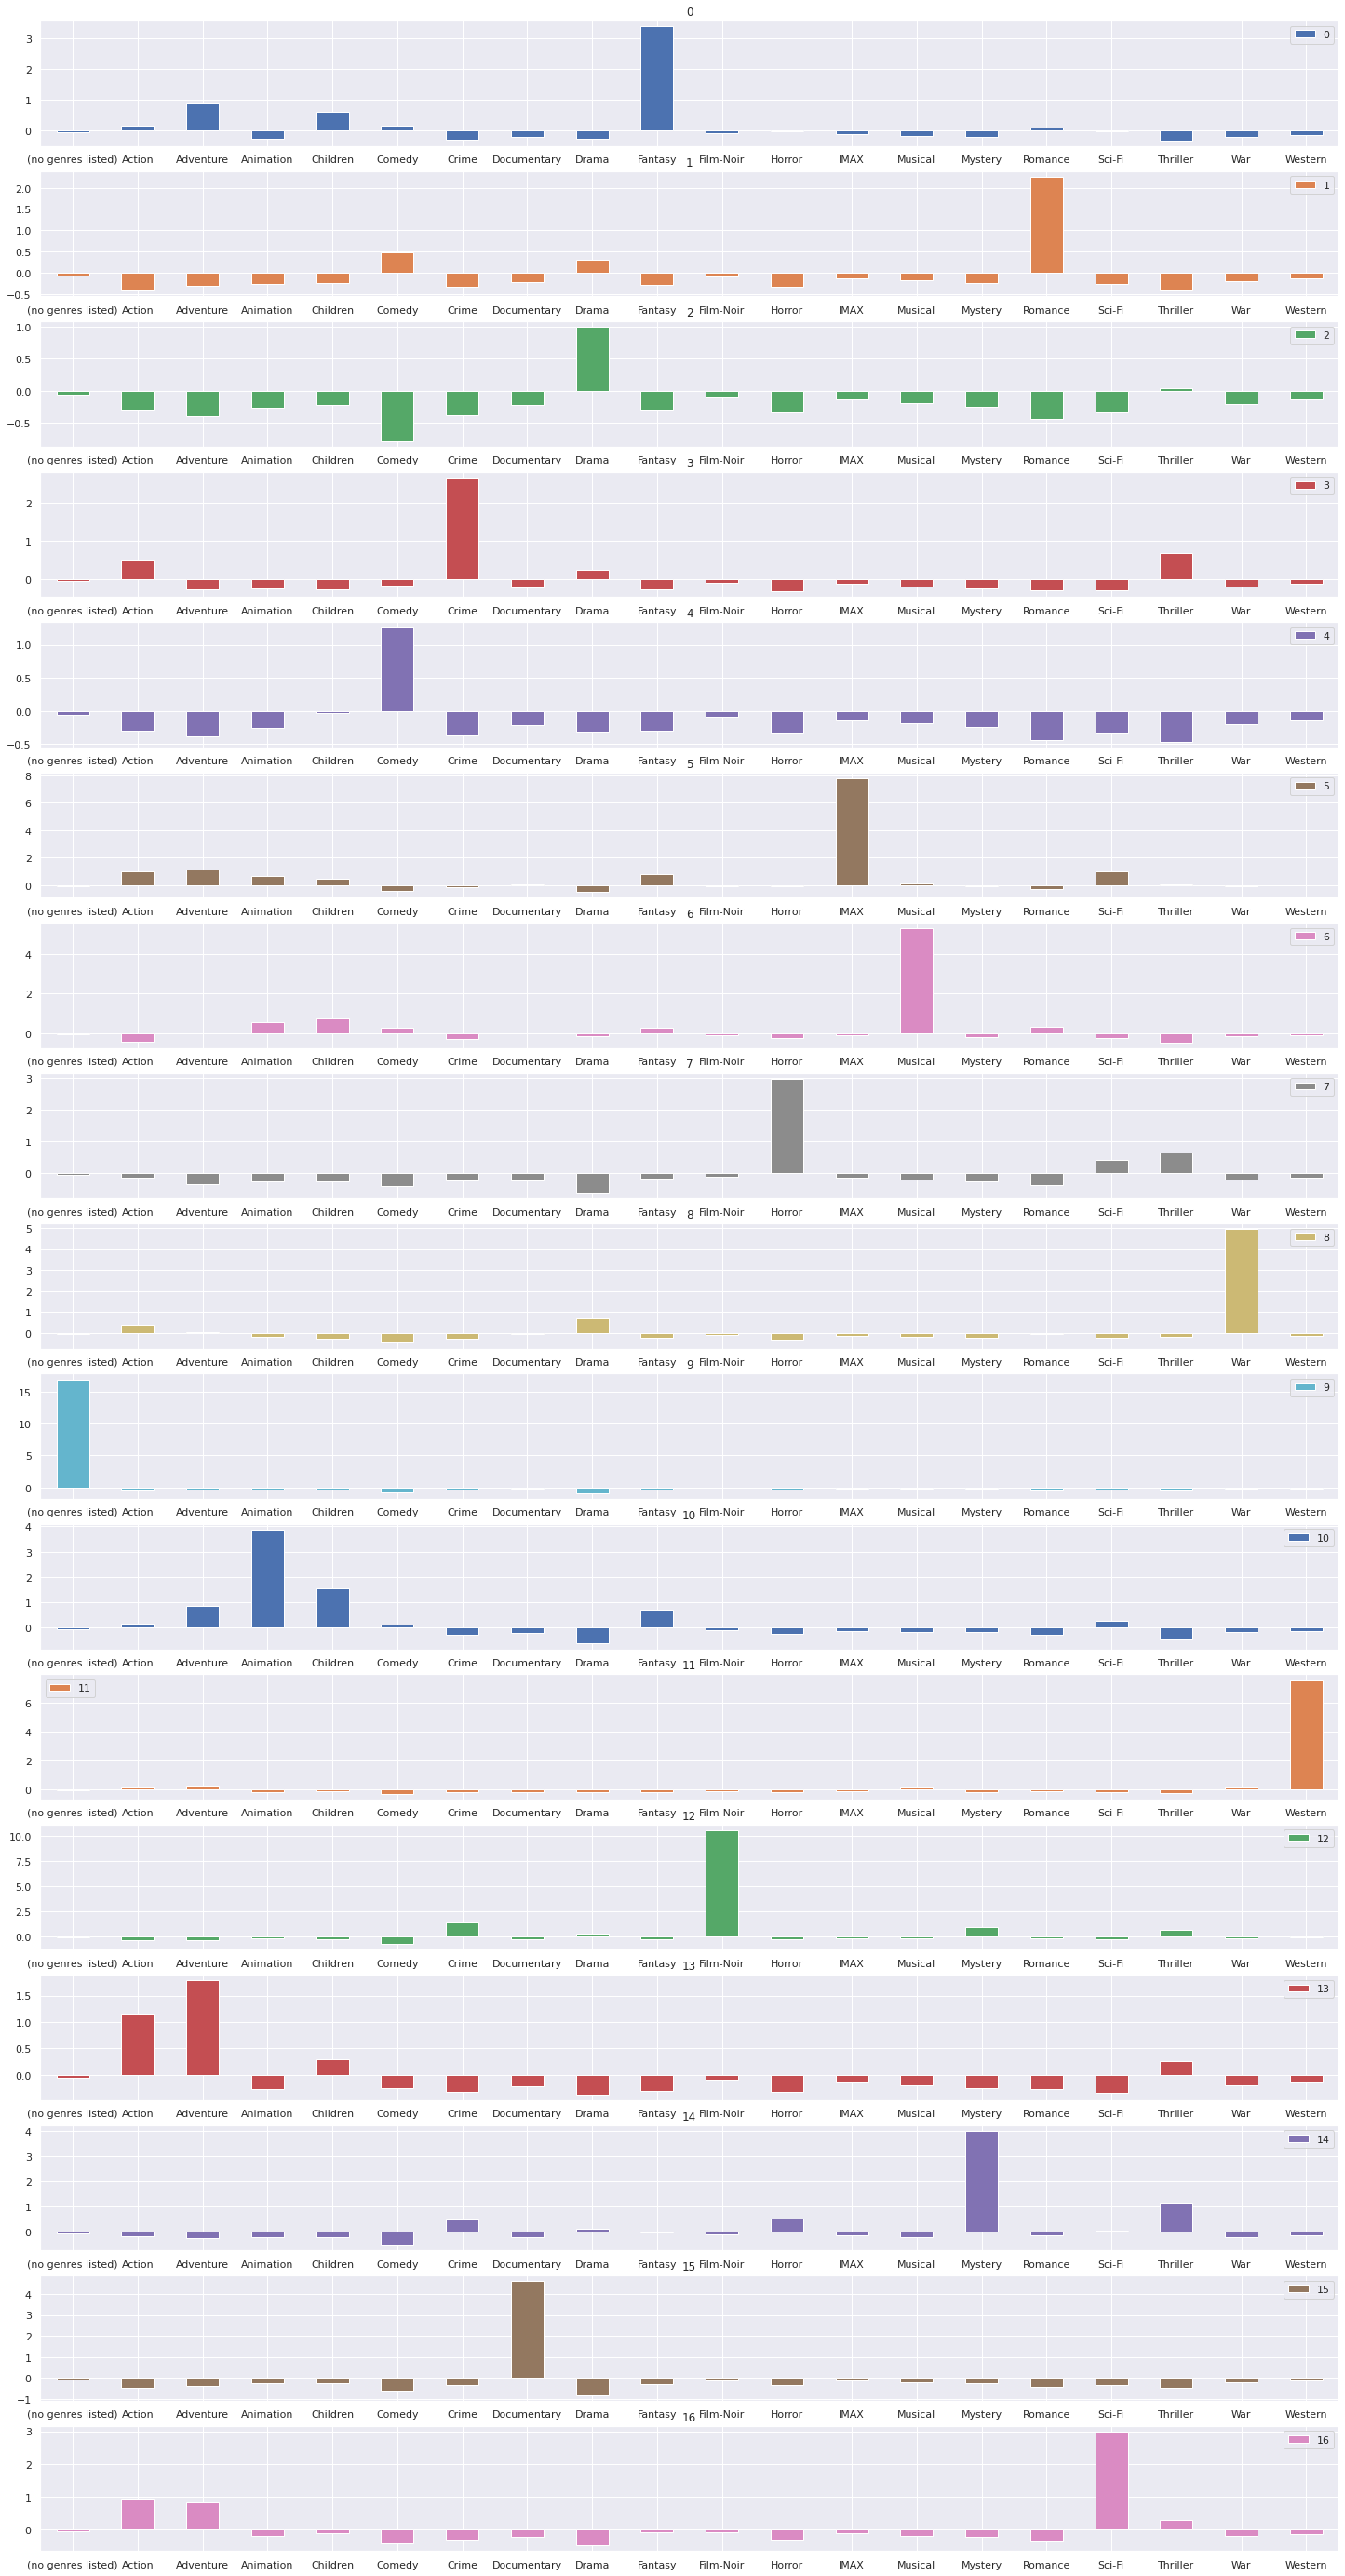

In [25]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                figsize=(25,50), 
                sharex=False,
                rot=0)

In [26]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4483,6624,Agent Cody Banks (2003),Action|Adventure|Children|Fantasy,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7930,95558,Beasts of the Southern Wild (2012),Drama|Fantasy,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
8796,130073,Cinderella (2015),Children|Drama|Fantasy|Romance,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
6266,47384,Zoom (2006),Adventure|Comedy|Drama|Fantasy,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
6075,41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6488,53125,Pirates of the Caribbean: At World's End (2007),Action|Adventure|Comedy|Fantasy,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7261,74530,Percy Jackson & the Olympians: The Lightning T...,Adventure|Fantasy,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3302,4467,"Adventures of Baron Munchausen, The (1988)",Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6946,65359,Earthsea (Legend of Earthsea) (2004),Adventure|Drama|Fantasy,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


O **KMeans** realiza um agrupamento particionado, ou seja, isolando em grupos aqueles tipos de filmes que parecem correlacionados. 

Existe, também, o agrupamento hierárquico. Ele calcula a matriz de distância dos dados para os demais. Desse modo, consegue definir os tipos de filmes próximos. Esse tipo de algoritmos é muito utilizado na análise de textos e palavras.

Existem duas abordagens... *Bottom-up* - O algoritmos começa separando os gêneros e corre até chegar no macro tipo (*Agglomerative*). *Top-down* - O algoritmo começa pelo filme e corre até os micro tipos (*Divisive*).

In [27]:
from sklearn.cluster import AgglomerativeClustering

O **Agglomerative Clustering** utilizar a estratégia *bottom-up* para montar a árvore.

In [34]:
num_clusters = 17
modelo = AgglomerativeClustering(n_clusters=num_clusters)

#fit_predict realiza o processamento e já retorna os grupos resultantes
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [29]:
tsne = TSNE()
visualizacao1 = tsne.fit_transform(generos_escalados)
visualizacao1

array([[-57.136448 , -19.404505 ],
       [ 13.841117 ,  60.46708  ],
       [ 22.202248 , -17.771313 ],
       ...,
       [  3.2057927,  21.138777 ],
       [ 45.548634 ,   8.789067 ],
       [ -6.777531 , -15.3282995]], dtype=float32)

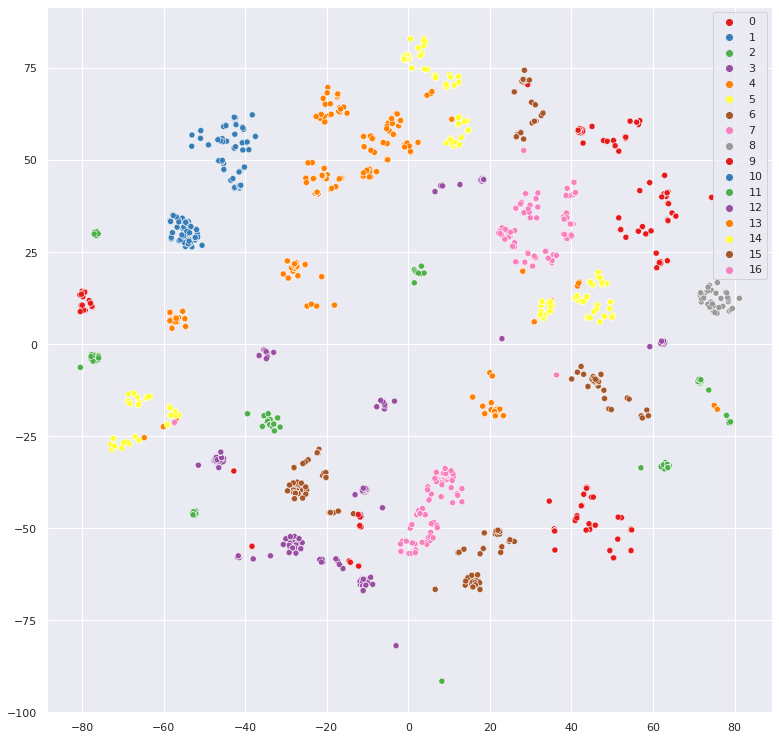

In [35]:
sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x=visualizacao1[:,0],
                y=visualizacao1[:,1],
                hue=grupos,
                palette=sns.color_palette('Set1', 17))

Construindo um dendrograma. O dendrograma é baseado na matriz de distância entre os elementos. 

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

`dendrogram` é a biblioteca para construir o gráfico

`linkage` é a função que vai calcular as distâncias.

Nesta atividade, vamos construir um dendrograma dos *clusters* que o KMeans agrupou. Dessa forma, será possível visualizar as ligações entre os tipos de filmes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9213626f60>,
      dtype=object)

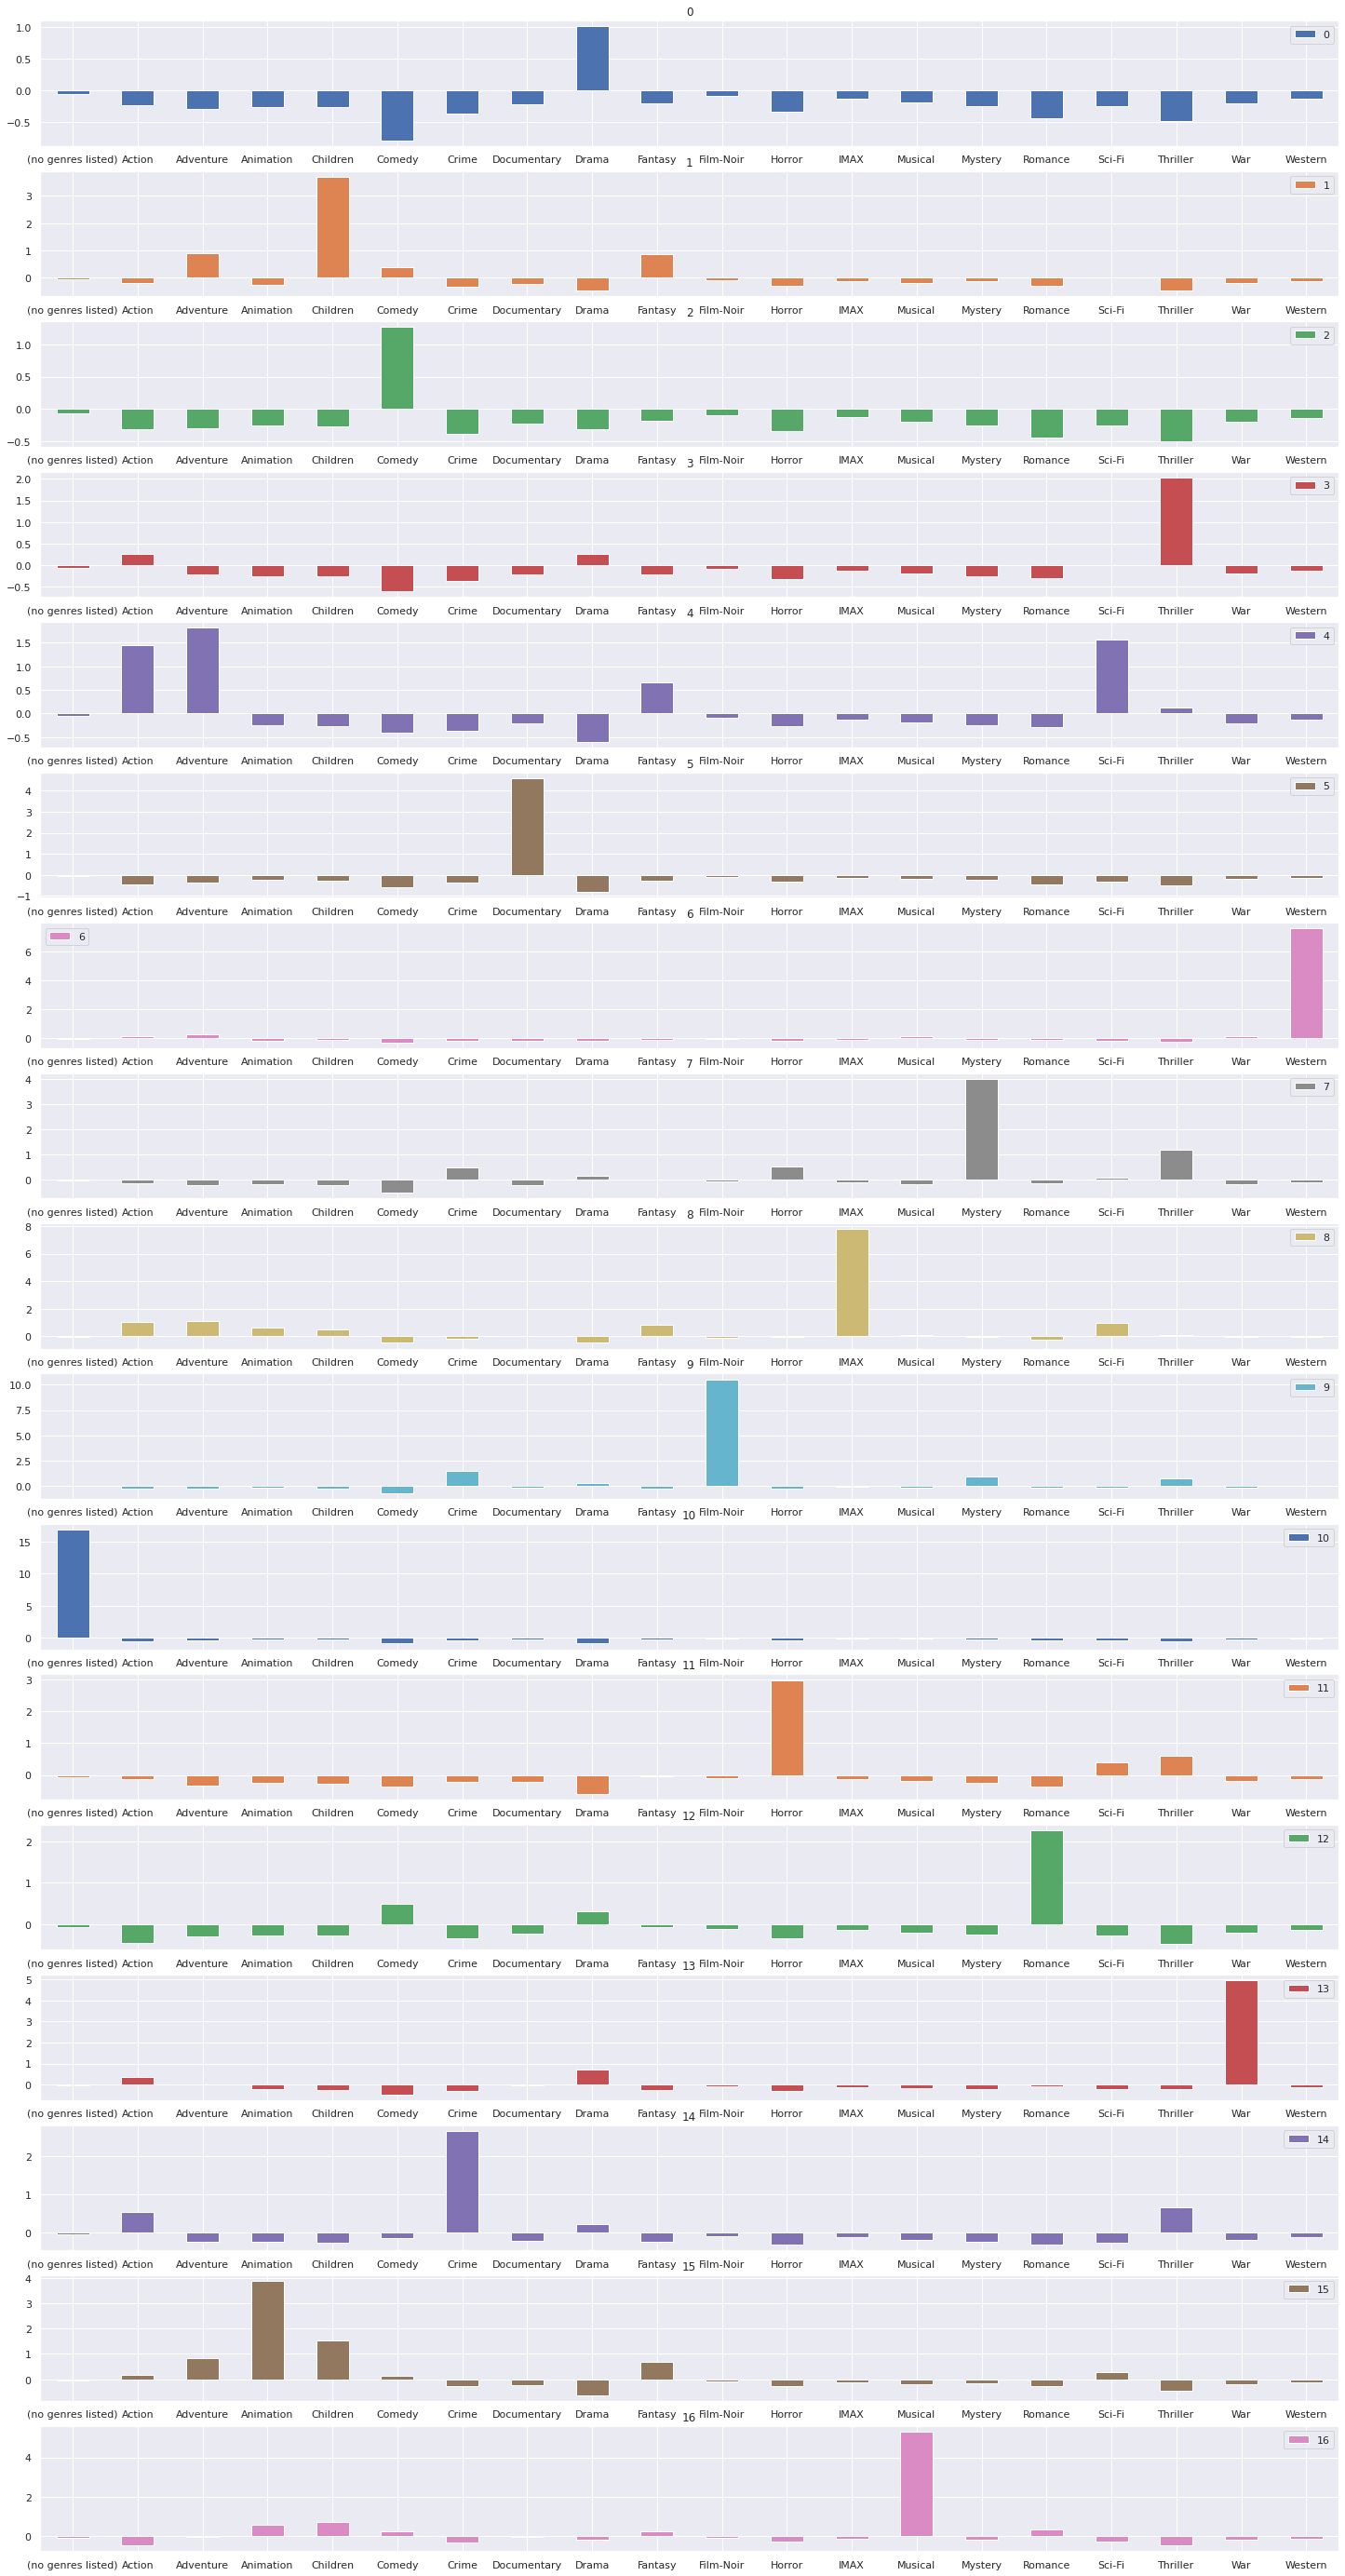

In [37]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                figsize=(25,50), 
                sharex=False,
                rot=0)

In [38]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 0.        ,  2.        ,  2.44169579,  2.        ],
       [ 3.        , 17.        ,  2.7059695 ,  3.        ],
       [12.        , 18.        ,  2.87941469,  4.        ],
       [14.        , 19.        ,  3.39677321,  5.        ],
       [ 4.        , 20.        ,  3.62551115,  6.        ],
       [11.        , 21.        ,  3.77845456,  7.        ],
       [ 1.        , 22.        ,  4.38124675,  8.        ],
       [ 7.        , 23.        ,  4.53190924,  9.        ],
       [15.        , 24.        ,  4.69237742, 10.        ],
       [ 5.        , 25.        ,  5.15704501, 11.        ],
       [13.        , 26.        ,  5.24114461, 12.        ],
       [16.        , 27.        ,  5.81711096, 13.        ],
       [ 6.        , 28.        ,  7.86916049, 14.        ],
       [ 8.        , 29.        ,  8.08241433, 15.        ],
       [ 9.        , 30.        , 10.81689921, 16.        ],
       [10.        , 31.        , 17.06657928, 17.        ]])

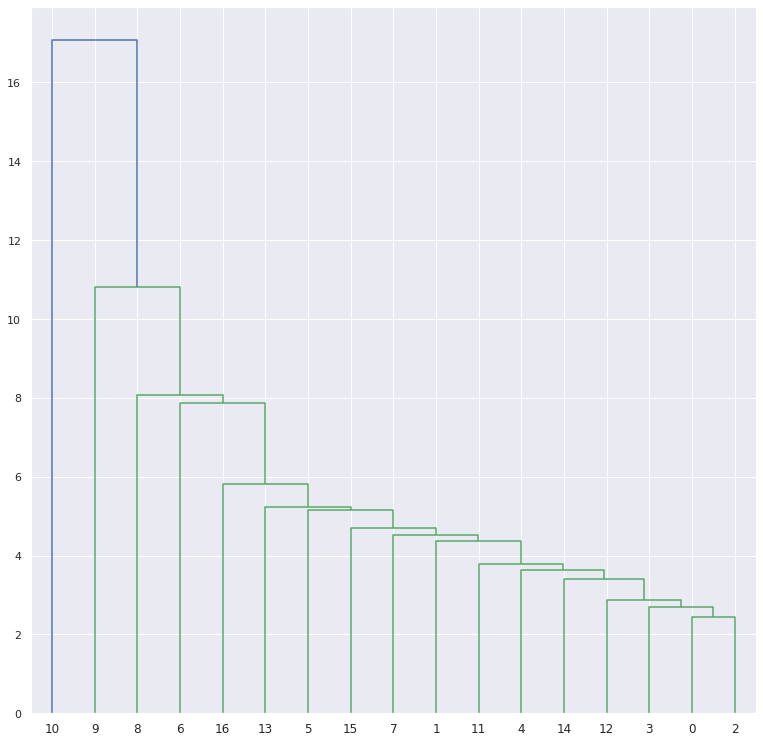

In [39]:
dendrograma = dendrogram(matriz_de_distancia)

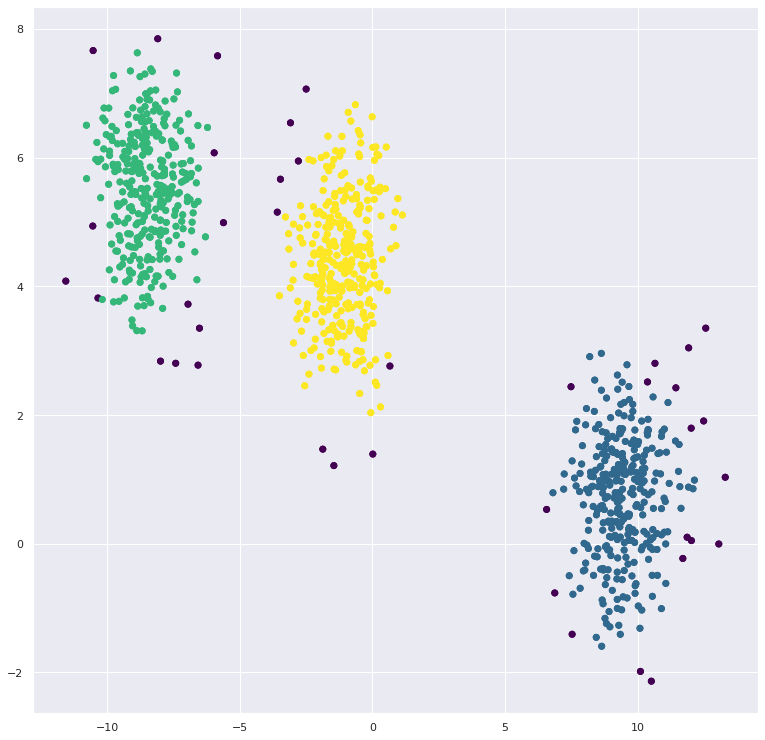

In [44]:
from sklearn.cluster import DBSCAN

modelo2 = DBSCAN()
grupos = modelo2.fit_predict(dados)

plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
